In [ ]:
# Jovac 
# Machine Learning Assignment 3: Linear and Logistic Regression


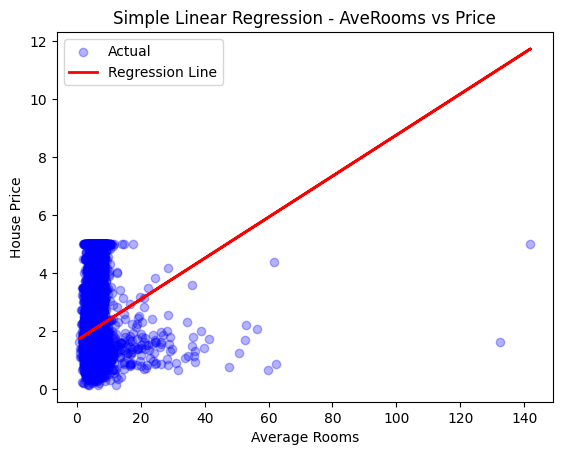

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load California Housing dataset
data = fetch_california_housing()
X = data.data[:, [3]]  # Using 'AveRooms' as a single feature
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plot regression line
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Average Rooms")
plt.ylabel("House Price")
plt.legend()
plt.show()



In [ ]:
 # Task 2: Multiple Linear Regression

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_multi = df[['AveRooms', 'AveOccup', 'HouseAge', 'MedInc']]
y_multi = df['MedHouseVal']

model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)
y_pred_multi = model_multi.predict(X_multi)

# Evaluation
r2 = r2_score(y_multi, y_pred_multi)
mse = mean_squared_error(y_multi, y_pred_multi)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("Coefficients:", model_multi.coef_)

R-squared: 0.5137
MSE: 0.6475
RMSE: 0.8047

Feature Coefficients:
    Feature  Coefficient
0    MedInc     0.443346
1  HouseAge     0.016875
2  AveRooms    -0.027349
3  AveOccup    -0.004461


In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Select some numeric features
X_selected = X[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']]


model1 = LinearRegression()
model1.fit(X_selected, y)
y_pred1 = model1.predict(X_selected)

# Evaluation
r2_1 = r2_score(y, y_pred1)
mse_1 = mean_squared_error(y, y_pred1)
rmse_1 = np.sqrt(mse_1)

print(" Without Scaling ")
print(f"R-squared: {r2_1:.4f}")
print(f"MSE: {mse_1:.4f}")
print(f"RMSE: {rmse_1:.4f}")



# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

model2 = LinearRegression()
model2.fit(X_scaled, y)
y_pred2 = model2.predict(X_scaled)

# Evaluation
r2_2 = r2_score(y, y_pred2)
mse_2 = mean_squared_error(y, y_pred2)
rmse_2 = np.sqrt(mse_2)

print("\n  With Scaling (StandardScaler) ")
print(f"R-squared: {r2_2:.4f}")
print(f"MSE: {mse_2:.4f}")
print(f"RMSE: {rmse_2:.4f}")


 Without Scaling 
R-squared: 0.5137
MSE: 0.6475
RMSE: 0.8047

  With Scaling (StandardScaler) 
R-squared: 0.5137
MSE: 0.6475
RMSE: 0.8047


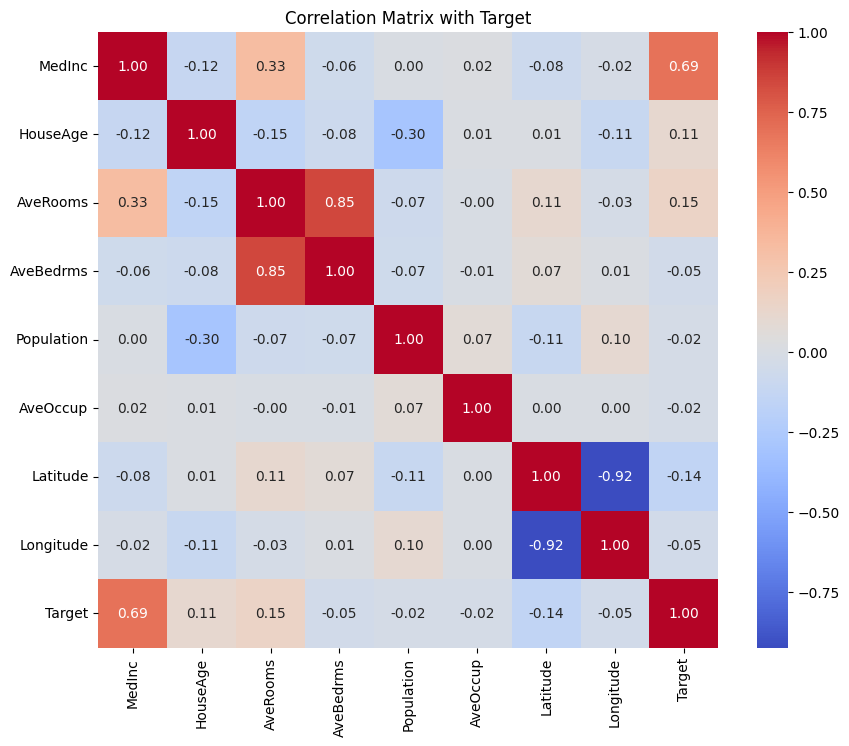


  Features Most Strongly Related to House Price 
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64

 Multicollinearity Discussion 

Multicollinearity occurs when two or more independent variables are highly correlated with each other.
This can make the regression model unstable because it's hard to tell which variable is actually affecting the target.

For example:
- 'AveRooms' and 'AveBedrms' may be highly correlated.
- This can lead to inflated coefficients and unreliable interpretations.

If multicollinearity is high:
- We might drop one of the correlated features.
- Or use dimensionality reduction techniques like PCA.



In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load California Housing data
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='Target')

# Combine features and target into one DataFrame
df = X.copy()
df['Target'] = y

plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Target")
plt.show()


correlation_with_target = corr_matrix['Target'].drop('Target')
strongest_features = correlation_with_target.sort_values(ascending=False)

print("\n  Features Most Strongly Related to House Price ")
print(strongest_features)

# -------------------------------
# Multicollinearity Discussion
# -------------------------------

print("\n Multicollinearity Discussion ")
print("""
Multicollinearity occurs when two or more independent variables are highly correlated with each other.
This can make the regression model unstable because it's hard to tell which variable is actually affecting the target.

For example:
- 'AveRooms' and 'AveBedrms' may be highly correlated.
- This can lead to inflated coefficients and unreliable interpretations.

If multicollinearity is high:
- We might drop one of the correlated features.
- Or use dimensionality reduction techniques like PCA.
""")
